In [78]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

## wikipedia API | 获取category下的page

In [ ]:
import wikipediaapi

wiki_wiki = wikipediaapi.Wikipedia('en')

category = wiki_wiki.page("Category:Indian_action_films")


def print_categorymembers(categorymembers, level=0, max_level=2):
        for c in categorymembers.values():
            print("{level_tag}: {title} (ns: {ns})".format(level_tag="*"*(level+1), title=c.title, ns=c.ns))
            if c.ns == wikipediaapi.Namespace.CATEGORY and level <= max_level:
                print_categorymembers(c.categorymembers, level + 1)


## wikipedia API | 获取Pageview

In [95]:
import pageviewapi as pv
import pageviewapi.period
from urllib.parse import quote

# [Timeline of the 2004 Indian Ocean earthquake]
# [Tingya]
# [Tokyo Conference]
# [Tom Hart (baseball)]
# [Triloknath Pandit]
# [Turtle Point Indian Reserve No. 12] wikipedia API 'Not found'
# [Udupi Kochikar Pai Family]
# [Umar Bin Muhammad Daudpota]
# [Unacademy]
# [University Convocation Complex]


target_raw = "Amitesh Mishra"
target = quote(target_raw)
target

b,e="20181010","20181020"

# pv.per_article('en.wikipedia',target,b,e,access="all-access",agent="all-agents",granularity="daily")

int(pv.period.avg_last("en.wikipedia",target,last=30))

# pageviewapi.legacy_pagecounts('fr.wikipedia', '2010010100', '2011010100', granularity='monthly')

'Amitesh%20Mishra'

3

In [83]:
import itertools
import pageviewapi as pv
import pageviewapi.period
from collections import deque
from urllib.parse import quote
def gen_titles():
    with open("/home/zhoutong/indiaDict_onlyTitle.txt","r") as f:
        for line in f:
            yield line.strip("[]\n")


dictGen = gen_titles()
save_batch = 1024
cnt = 0
with open("/home/zhoutong/indiaDict_title_withPV","w+") as f:
    while True:
        cnt += 1
        targetList = list(itertools.islice(dictGen,save_batch))
        if(len(targetList)>0):
            to_write = deque()
            for target_raw in targetList:
                target = quote(target_raw)
                try:
                    last_7 = int(pv.period.sum_last("en.wikipedia",target,last=7))
                    last_30 = int(pv.period.sum_last("en.wikipedia",target,last=30))
                    last_90 = int(pv.period.sum_last("en.wikipedia",target,last=90))
                    last_365 = int(pv.period.sum_last("en.wikipedia",target,last=365))
                except pageviewapi.client.ZeroOrDataNotLoadedException as exp:
                    last_7 = -1
                    last_30 = -1
                    last_90 = -1
                    last_365 = -1
                result = [str(i) for i in [target,last_7,last_30,last_90,last_365]]
                to_write.append("\u0394".join(result)+"\n")
                
            f.writelines(to_write)
            print("%s completed" % (cnt*save_batch))
        else:
            break

#     ../pangguosheng/python/bin/python


KeyboardInterrupt: 

## 脚本用

In [38]:
#####################
# ppp.sh:
#   nohup python3 -u xxx.py > out_xxx.out &
#   nohup python3 -u xxx.py > out_xxx.out &
#   nohup python3 -u xxx.py > out_xxx.out &
# 同时开启多个python进程调用wikiAPI
#####################
import itertools
import pageviewapi as pv
import pageviewapi.period
from collections import deque
import sys
from urllib.parse import quote

file_tag = sys.argv[1]
load_path = "/home/zhoutong/indiaDicts/indiaDict_onlyTitle_%s" % file_tag
save_path = "/home/zhoutong/indiaDicts_withPV/indiaDict_%s" % file_tag
print("file_tag is %s" % file_tag)
print("read file at: %s" % load_path)
print("save file at: %s" % save_path)
def gen_titles():
    with open(load_path,"r") as f:
        for line in f:
            yield line.strip("[]\n")


dictGen = gen_titles()
save_batch = 10
cnt = 0
with open(save_path,"w+") as f:
    while True:
        cnt += 1
        targetList = list(itertools.islice(dictGen,save_batch))
        if(len(targetList)>0):
            to_write = deque()
            for target_raw in targetList:
                target = quote(target_raw)
                try:
                    last_7 = int(pv.period.sum_last("en.wikipedia",target,last=7))
                    last_30 = int(pv.period.sum_last("en.wikipedia",target,last=30))
                    last_90 = int(pv.period.sum_last("en.wikipedia",target,last=90))
                    last_365 = int(pv.period.sum_last("en.wikipedia",target,last=365))
                except pageviewapi.client.ZeroOrDataNotLoadedException as exp:
                    last_7 = -1
                    last_30 = -1
                    last_90 = -1
                    last_365 = -1
                result = [str(i) for i in [target_raw,last_7,last_30,last_90,last_365]]
                to_write.append("\u0394".join(result)+"\n")
                
            f.writelines(to_write)
            print("%s completed" % (cnt*save_batch))
        else:
            break




'1,2,3,4'

In [91]:
from urllib.parse import unquote

with open("/home/zhoutong/indiaDicts_withPV/indiaDictWith_Title_PV.txt", "w+") as f_toSave:
    with open("/home/zhoutong/indiaDicts_withPV/indiaDictWith_Title_PV_urlencode.txt", "r+") as f:
        f_toSave.writelines([unquote(i) for i in f.readlines()])


In [89]:
"\u0394"


'Δ'

35000.0

## 可视化

In [79]:
import pandas as pd
import math
import matplotlib.pyplot as plt
df = pd.read_csv("/home/zhoutong/data.csv",header=None,names=["textLength","pv7","pv30","pv90","pv365"])
# df['pv7'] = df['pv7'].apply(lambda x: x if x>0 else 1).apply(math.log)
df.head(3)

,textLength,pv7,pv30,pv90,pv365
0,8976,6418.0,28427.0,80323.0,373616.0
1,577,20.0,129.0,453.0,1784.0
2,510,30.0,146.0,469.0,1706.0


In [92]:
# 0.999 百分位 和 0.001 百分位
threshold = df['pv7'].quantile(0.99999)
df['pv7'].describe()
df.describe()
df.quantile(0.01)

count    1.425930e+05
mean     6.451731e+02
std      1.054741e+04
min     -5.000000e+00
25%      2.700000e+01
50%      7.400000e+01
75%      2.740000e+02
max      3.409621e+06
Name: pv7, dtype: float64

,textLength,pv7,pv30,pv90,pv365
count,142593.000000,1.425930e+05,1.425930e+05,1.425930e+05,1.425930e+05
mean,7902.661393,6.451731e+02,2.985868e+03,9.133642e+03,3.613183e+04
std,13266.352936,1.054741e+04,2.325116e+04,5.115320e+04,1.844021e+05
min,55.000000,-5.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,2512.000000,2.700000e+01,1.300000e+02,4.170000e+02,1.767000e+03
50%,4462.000000,7.400000e+01,3.590000e+02,1.160000e+03,4.967000e+03
75%,8240.000000,2.740000e+02,1.334000e+03,4.317000e+03,1.817100e+04
max,665314.000000,3.409621e+06,5.832375e+06,7.653357e+06,1.470898e+07


textLength    582.0
pv7             5.0
pv30           31.0
pv90           98.0
pv365         347.0
Name: 0.01, dtype: float64

In [167]:
# 统计 textLength
def sta(inp,left_cut=-float('inf'),right_cut=float('inf'),top_cut=float("inf"),show=0):
    df_tmp = df.groupby(inp).size().reset_index(name="count").sort_values(by=[inp])
    df_toUse = df_tmp[(df_tmp[inp] > left_cut) & (df_tmp[inp] < right_cut) & (df_tmp["count"]<top_cut)]
    df_toUse.plot(title=inp,x=inp,y='count')
    plt.show()
    print("*** groupby(inp).size:\n",df_toUse.groupby(inp).size().reset_index(name="count").describe())
    if(show>0): print("*** head(show)\n",df_toUse.groupby(inp).size().reset_index(name="count").head(show))


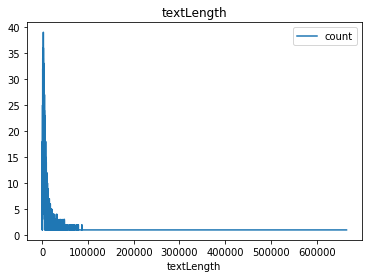

*** groupby(inp).size:
           textLength    count
count   26250.000000  26250.0
mean    20784.363886      1.0
std     25970.276707      0.0
min        55.000000      1.0
25%      6706.250000      1.0
50%     13527.500000      1.0
75%     24917.000000      1.0
max    665314.000000      1.0


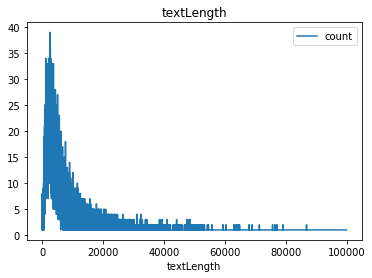

*** groupby(inp).size:
          textLength    count
count  25768.000000  25768.0
mean   18437.886759      1.0
std    17421.017919      0.0
min       55.000000      1.0
25%     6585.750000      1.0
50%    13251.500000      1.0
75%    23917.750000      1.0
max    99975.000000      1.0


In [168]:
sta("textLength")
sta("textLength",right_cut=100*1000)

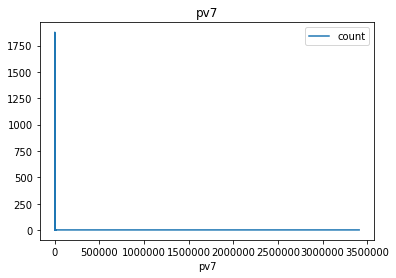

*** groupby(inp).size:
                 pv7   count
count  6.902000e+03  6902.0
mean   8.127048e+03     1.0
std    4.723795e+04     0.0
min   -5.000000e+00     1.0
25%    1.725250e+03     1.0
50%    3.716500e+03     1.0
75%    7.677750e+03     1.0
max    3.409621e+06     1.0


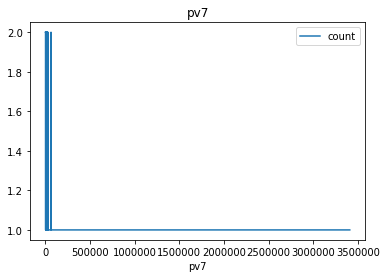

*** groupby(inp).size:
                 pv7   count
count  4.267000e+03  4267.0
mean   1.220810e+04     1.0
std    5.970944e+04     0.0
min   -5.000000e+00     1.0
25%    3.939500e+03     1.0
50%    6.315000e+03     1.0
75%    1.116500e+04     1.0
max    3.409621e+06     1.0
*** head(show)
       pv7  count
0    -5.0      1
1  1307.0      1
2  1392.0      1
3  1412.0      1
4  1415.0      1
5  1457.0      1
6  1473.0      1
7  1476.0      1
8  1490.0      1
9  1499.0      1


In [169]:
sta("pv7")
sta("pv7",top_cut=3,show=10)

In [77]:
sta("pv30")

NameError: name 'sta' is not defined

              pv365        count
count  4.665100e+04  46651.00000
mean   9.863024e+04      3.05659
std    3.128547e+05      4.98006
min   -1.000000e+00      1.00000
25%    1.204900e+04      1.00000
50%    3.014300e+04      1.00000
75%    8.213900e+04      3.00000
max    1.470898e+07    113.00000


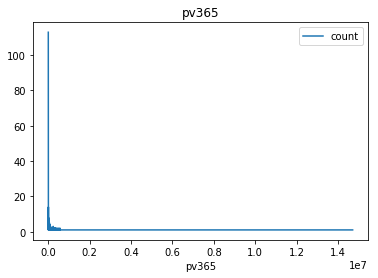

In [130]:
sta("pv365")

In [134]:
int('inf')

ValueError: invalid literal for int() with base 10: 'inf'

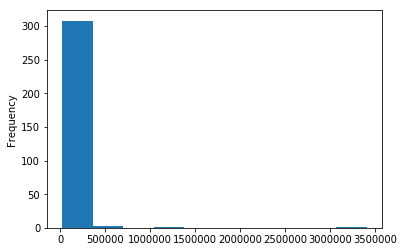

In [76]:
tmp = df['pv7'].sort_values().reset_index(drop=True)

a = tmp[(tmp.index>142280)]

a.plot(kind='hist')




84966

hit_wordCnt    2.0
Name: 0.28, dtype: float64

295067

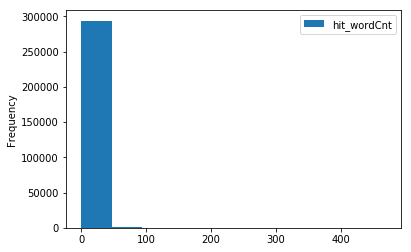

In [120]:
df1=pd.read_csv("/home/zhoutong/data.csv",header=None,names=["hit_wordCnt"])
df1.plot(kind='hist')
df1[df1['hit_wordCnt'] <= 2].size


# df1[df1['hit_wordCnt'] >= 50].size
df1.quantile(0.28)
df1.size


In [1]:
import requests
url = "https://36kr.com/newsflashes"
requests.get(url)